# **ASSIGNMENT 7**
---

# **Name:** Prashant Agheda
# **PRN No:** 20210804004
# **Subject:** Advanced AI

---

## **Topic:** Bandit Problem.

## **Aim:** TO STUDY AND PERFORM BANDIT PROBLEM..

### **Steps To Perform:**

## **1. Describe the Number of bandits.**

In [1]:
# Importing the required libraries

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
class Environment:

    def __init__(self, probs):
        # success probabilities for each arm
        self.probs = probs

    def step(self, action):
        # Pull arm and get stochastic reward (1 for success, 0 for failure)
        return 1 if (np.random.random()  < self.probs[action]) else 0

class Agent:

    def __init__(self, nActions, eps):
        self.nActions = nActions
        self.eps = eps
        # action counts n(a)
        self.n = np.zeros(nActions, dtype=int)
        # value Q(a)
        self.Q = np.zeros(nActions, dtype=float)

    def update_Q(self, action, reward):
        # Update Q action-value given (action, reward)
        self.n[action] += 1
        self.Q[action] += (1.0/self.n[action]) * (reward - self.Q[action])

    def get_action(self):
        # Epsilon-greedy approach
        # explore
        if np.random.random() < self.eps:
            return np.random.randint(self.nActions)
        # exploit
        else:
            return np.random.choice(np.flatnonzero(self.Q == self.Q.max()))

In [4]:
# Start multi-armed bandit simulation

def experiment(probs, N_episodes):
    # initialize arm probabilities
    env = Environment(probs)
    # initialize agent
    agent = Agent(len(env.probs), eps)
    actions, rewards = [], []

    for episode in range(N_episodes):
        # sample policy
        action = agent.get_action()
        # take step + get reward
        reward = env.step(action)
        # update Q
        agent.update_Q(action, reward)
        actions.append(action)
        rewards.append(reward)
        
    return np.array(actions), np.array(rewards)

In [5]:
# Settings
# bandit arm probabilities of success

# Describe the Number of bandits and Success probabilities
probs = [ 0.10, 0.50, 0.60, 0.80, 0.10,
          0.25, 0.60, 0.45, 0.75, 0.65 ]

# number of experiments to perform
# The number of trials.
N_experiments = 1000

# number of steps (episodes)
N_steps = 500

# probability of random exploration (fraction)
eps = 0.1

# Run multi-armed bandit experiments
print("Running multi-armed bandits with nActions = {}, eps = {}".format(len(probs), eps))

# reward history sum
R = np.zeros((N_steps,))

# action history sum
A = np.zeros((N_steps, len(probs)))

for i in range(N_experiments):
  # perform experiment
  actions, rewards = experiment(probs, N_steps)
  
  if (i + 1) % (N_experiments / 100) == 0:
    print("[Trail Experiment: {}/{}] ".format(i + 1, N_experiments) +
          "n_steps = {}, ".format(N_steps) +
          "reward_avg = {}".format(np.sum(rewards) / len(rewards)))
    
    R += rewards

    for j, a in enumerate(actions):
        A[j][a] += 1

Running multi-armed bandits with nActions = 10, eps = 0.1
[Trail Experiment: 10/1000] n_steps = 500, reward_avg = 0.716
[Trail Experiment: 20/1000] n_steps = 500, reward_avg = 0.738
[Trail Experiment: 30/1000] n_steps = 500, reward_avg = 0.668
[Trail Experiment: 40/1000] n_steps = 500, reward_avg = 0.728
[Trail Experiment: 50/1000] n_steps = 500, reward_avg = 0.6
[Trail Experiment: 60/1000] n_steps = 500, reward_avg = 0.708
[Trail Experiment: 70/1000] n_steps = 500, reward_avg = 0.784
[Trail Experiment: 80/1000] n_steps = 500, reward_avg = 0.67
[Trail Experiment: 90/1000] n_steps = 500, reward_avg = 0.654
[Trail Experiment: 100/1000] n_steps = 500, reward_avg = 0.716
[Trail Experiment: 110/1000] n_steps = 500, reward_avg = 0.766
[Trail Experiment: 120/1000] n_steps = 500, reward_avg = 0.656
[Trail Experiment: 130/1000] n_steps = 500, reward_avg = 0.756
[Trail Experiment: 140/1000] n_steps = 500, reward_avg = 0.704
[Trail Experiment: 150/1000] n_steps = 500, reward_avg = 0.634
[Trail Ex

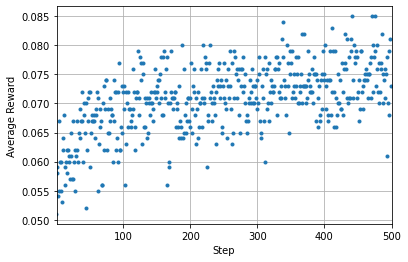

In [6]:
# Plot reward results

R_avg =  R / float(N_experiments)

plt.plot(R_avg, ".")
plt.xlabel("Step")
plt.ylabel("Average Reward")
plt.grid()
plt.xlim([1, N_steps])
plt.show()

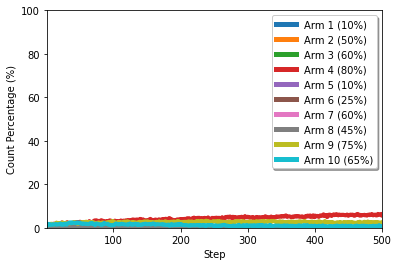

In [7]:
# Plot action results

for i in range(len(probs)):
    A_pct = 100 * A[:,i] / N_experiments
    steps = list(np.array(range(len(A_pct)))+1)
    plt.plot(steps, A_pct, "-",
             linewidth=4,
             label="Arm {} ({:.0f}%)".format(i+1, 100*probs[i]))
    
plt.xlabel("Step")
plt.ylabel("Count Percentage (%)")
leg = plt.legend(loc="upper right", shadow=True)
plt.xlim([1, N_steps])
plt.ylim([0, 100])

for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)

plt.show()



---



## **Observations:**

- From above graphs, we can observe and tell that **Arm 4 with 80% has the Highest Winning Rate.**
- **Arm 9 with 75% has 2nd Highest Winning Rate.**
- **Arm 10 with 65% has 3rd Highest Winning Rate.**



---

